# PACESによる学費の割引券配布について

## 概要
- 教育に対しての何らかの補助を行うことでその質を改善する際，教育を提供する側である学校に対して補助を行うべきか，それとも教育の受給者側である生徒側に対して補助を行うべきかという議論が存在する．
- 今回は，コロンビアで行われた学費の割引券を配る実験によって得られたデータを分析し，受給者の経済的負担に対して補助を行うことの効果を検証した論文を用いる．
- 1990年代のコロンビアにおいて公立学校は上手く機能しておらず，私立学校に通うことはより良い教育を受けるための代表的な手段の1つであった．
- しかし一方で私立学校は比較的高い学費を要求するため，多くの人にとっては私立学校は経済面から通い肉物となっていた．
- これに加え，私立学校の中でもより良い教育を受けるためには，より高い学費を支払う必要があるという状況だった．
- よってこのような状況において割引券を配布することは私立学校への通学者を増やし，多くの生徒により質の高い教育をもたらすことが期待される．
- コロンビアではより良い教育を多くの貧困層の子供に受けてもらうために，PACESと呼ばれるプロジェクトを発足した．
- 12万人ほどのSecondary Schoolの学生に対して，応募者の中からランダムに選択した当選者に私立学校の半分程度を政府が肩代わりする割引券を配った．

### この割引券を介入としたときの特徴
#### 1つ目
- 割引券は私立学校の価格を大幅に下げることである．  
- これは私立学校の学費，つまりは価格を下げることを意味するため，当選したグループにおいて私立学校へ通う割合が大きくなりそうだと予想される．  
- また，当選した場合には本来の所得の限界で通学できない学費の高い学校を選択できるため，受ける教育の質が向上するという効果も望むことができる．

#### 2つ目
- このしくみによって生徒が落第しないように努力するインセンティブが発生する点がある．  
- 割引券は経済的な負担を減らすため，生徒が落第して割引券が執行した場合には，その親にとっては所得が減少するような影響をもたらすことになる．  
- つまり親としても経済的負担の観点から子に一定の成績をおさめるように仕向けるインセンティブが存在することになる．  
- こららのことから割引券が当選したグループでは教育の質が向上するとともに，留年しないように努力する結果として留年の減少が起きると期待される．

## 設定
- この例では介入がランダムにアサインされているため，RCTを実行しているという設定になる．  
- 一見このような設定では回帰分析を行う必要がないように思われる．  
- しかし実際のデータは，介入がランダムに決定され，それから数年経ったあとの調査に回答してくれた結果から得ている．  
- 下図
![回帰分析を利用した探索的な効果検証_1](images/回帰分析を利用した探索的な効果検証_1.png)

## 問題
- 調査に回答するか否かの意思決定の傾向が当選グループと非当選グループにおいて異なるような場合，データとして得られるサンプルの傾向はこれらのグループ間で異なってしまう．  
- 例えば所得が低い場合には．自分の経済的な立場について回答したくないという傾向が発生する事がある．  
- もし介入が将来の所得を押し上げるような効果がある場合，介入が行われなかっったグループでは調査の回答を得られない可能性が高くなる．  
- この結果，調査の回答を得られたデータでは介入が行われなかったグループの所得が本来よりも高くなり，介入の所得に対する効果が大きくなるといったことが起きてしまう．

## 解決方法
- これはランダムな割り振りのあとに調査があることから，たとえ介入の割り振り自体がランダムにうまくできていたとしても問題になり得るということになる．  
- このようにランダムに割り振ったRCTの設定に置いても，そのデータを加工に加えたり追加の調査を実施した場合は結果としてセレクションバイアスが発生してる可能性が考えられるので，それに対応した方法を用いる必要がある．
- よって，ここでの回帰分析は主に調査方法の影響を取り除くような共変量を選択する．

# Rによる回帰分析の実行

## データ説明
**vouchersデータセット**

|変数名|説明|
|:-------|:------|
|SVY|電話による調査が行われたか？|
|HSVIST|調査が対面によって行われたか？|
|DMONTH1-12|調査が何月に行われたか？|
|AGE|調査時の学生の年齢|
|SEX2|学生の性別|
|STRATA1-6,MS|調査対象の親の社会的地位の分類|

- SVY，HSVISITは調査の方法の影響を取り除き，DMONTH1-12は調査のタイミングの影響を取り除く．  
- AGE，SEX，STRATAは調査の回答が偏っている際にセレクションバイアスを発生させそうな変数と考えられる．

## モデル構築
- 割引券がどのような影響を与えてたいのかを分析するために，さまざまな目的変数に対して回帰分析を行う．  
- ここで利用する回帰モデルは以下のようになる．

$$
Y_{i, j} = \beta_{0, j} + \sum_{k=1}^K \beta_{k,j}X_i + \gamma_jZ_i + u_i
$$

- Yは目的変数を表すが，今回はさまざまな目的変数に対する効果を検証するため，$j$という添字をモデルの表記に追加している．  
- 例えば$Y_{i1}$は生徒$i$が奨学金を受け取っているか否かを示し，$Y_{i2}$は生徒$i$が私立学校へ通っているか否かを表す．  
- つまり，$j$個の回帰モデルがあり，それぞれ別々に推定していることを意味する．

**Rコード**

```R
# ライブラリーとデータの読み込み
remotes::install_github("itamaracaspi/experimentdatar")
library(experimentdatar)
library(broom)
library(tidyverse)
library(vouchers)

data(vouchers)
vouchers
```

In [153]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

sns.set()

In [4]:
df = pd.read_csv("./datas/vouchers.csv")
df.head()

,ID,BOG95SMP,BOG97SMP,JAM93SMP,SEX,AGE,AGE2,HSVISIT,SCYFNSH,INSCHL,...,REPT,NREPT,FINISH6,FINISH7,FINISH8,SEX_MISS,USNGSCH,HOURSUM,TAB3SMPL,WORKING3
0,NaN,0,0,0,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0,0,0,1.0,NaN,12.0,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,0,0,0,0.0,NaN,13.0,NaN,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1,0,0,0.0,14.0,12.0,0.0,8,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4.0,1,0,0,1.0,14.0,12.0,0.0,8,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


**Rコード**
```R
# Angrist(2002)のTable 3. bogota 1995の再現
## 回帰式の準備
### 回帰式で浸かる文字列の準備

formula_base <- "VOUCHO"
formula_x_covariate <- "SVY + HSVISIT + AGE + STRATA1 + STRATA2 + STRATA3 + STRATA4 +
    STRATA5 + STRATA6 + STRATAMS + D1993 + D1995 + D1997 +
    DMONTH1 + DMONTH2 + DMONTH3 + DMONTH4 + DMONTH5 + DMONTH6 +
    DMONTH7 + DMONTH8 + DMONTH9 + DMONTH10 + DMONTH11 + DMONTH12 + SEX2"

formula_y <- c(
    "TOTSCYRS", "INSCHL", "PRSCH_C", "USNGSCH", "PRSCHA_1", "FINISH6", "FINISH7",
    "FINISH8", "REPT6", "REPT", "NREPT", "MARRIED", "HASCHILD", "HOURSUM", "WORKING3"
)

### formula_yの各要素に対して共変量を含まない回帰式の作成
base_reg_formula <- paste(formula_y, "~", formula_x_base)
names(base_reg_formula) <- paste(formula_y, "base", sep = "_")

### formula_yの各要素に対して共変量を含む回帰式の作成
covariate_reg_formula <- paste(
    formula_y, "~", forumula_x_base, "+", formula_x_covariate
)
names(covariate_reg_formula) <- paste(formula_y, "covariate", sep = "_")


### モデル式のベクトルを作成
table3_formula <- c(base_reg_formula, covariate_reg_formula)

### モデル式のベクトルをデータフレーム化する
model <- table3_formula %>%
    enframe(name = "model_index", value = "formula")

## 回帰分析の実行
### bogota 1995のデータを抽出
regression_data <- vouchers %>% filter(TAB3SMPL == 1, BOG95SMP == 1)

### まとめて回帰分析を実行
df_models <- models %>%
    mutate(model = map(.x = formula, .f = lm, data = regression_data)) %>%
    mutate(lm_result = map(.x = model, .f = tidy))

### モデルの結果を整形
df_results <- df_models %>%
    mutate(formula = as.character(formula)) %>%
    select(formula, model_index, lm_result) %>%
    unnest(cols = c(lm_result))
```

In [109]:
# Angrist(2002)のTable 3. bogota 1995の再現
## 回帰式の準備
### 回帰式で浸かる文字列の準備

formula_x_base = "VOUCH0"
formula_x_covariate = """
    SVY + HSVISIT + AGE + STRATA1 + STRATA2 + STRATA3 + STRATA4 +
    STRATA5 + STRATA6 + STRATAMS + D1993 + D1995 + D1997 +
    DMONTH1 + DMONTH2 + DMONTH3 + DMONTH4 + DMONTH5 + DMONTH6 +
    DMONTH7 + DMONTH8 + DMONTH9 + DMONTH10 + DMONTH11 + DMONTH12 + SEX2
"""

formula_y = [
    "TOTSCYRS", "INSCHL", "PRSCH_C", "USNGSCH", "PRSCHA_1", "FINISH6", "FINISH7",
    "FINISH8", "REPT6", "REPT", "NREPT", "MARRIED", "HASCHILD", "HOURSUM", "WORKING3"
]

### formula_yの各要素に対して共変量を含まない回帰式の作成
base_reg_formula = {f"{y}_base": f"{y} ~ {formula_x_base}" for y in formula_y}

### formula_yの各要素に対して共変量を含む回帰式の作成
covariate_reg_formula = {f"{y}_covariate": f"{y} ~ {formula_x_base} + {formula_x_covariate}" for y in formula_y}

### モデル式の辞書を作成
table3_formula = base_reg_formula | covariate_reg_formula

### モデル式をDataframeに格納
df_model = pd.DataFrame(
    data=[formula for formula in table3_formula.values()],
    columns=["formula"],
    index=[model_index for model_index in table3_formula.keys()]
)

## 回帰分析の実行
### bogota 1995のデータを抽出
df_regression = df.query("TAB3SMPL == 1 & BOG95SMP == 1")

### まとめて回帰分析を実行
df_model["model"] = df_model["formula"].map(
    lambda x: sm.OLS.from_formula(formula=x, data=df_regression).fit()
)

### モデルの結果を整形
df_result = df_model.assign(
    estimate=lambda df_: df_["model"].map(lambda x: x.params),
    ci_95=lambda df_: df_["model"].map(lambda x: x.conf_int()),
    pvalue=lambda df_: df_["model"].map(lambda x: x.pvalues)
)

## 私立学校への通学と割引券の利用についての分析
- 当選したグループでそもそも割引券がちゃんと使われたのかを確認するため，6年生の開始時に私立学校に在籍していたかを示す**PRSCHA_1**と調査期間中に何かしらの奨学金を使ったかを示す**USNGSCH**に対する回帰分析の結果を参照する．

**Rコード**
```R
# 通学率と奨学金の利用
using_voucher_results <- df_results %>%
    filter(term == "VOUCH0", str_detect(model_index, "PRSCHA_1|USNGSCH")) %>%
    select(model_index, term, estimate, std.error, p.value) %>%
    arrage(model_index)
```

In [147]:
# 通学率と奨学金の利用
FILTER_TERM = "VOUCH0"

df_using_voucher_results = (
    df_result
    .filter(regex="PRSCHA_1|USNGSCH", axis="index")
    .reset_index(names="model_index")
    .assign(
        term=filter_term,
        estimate=lambda df_: df_["estimate"].map(lambda x: x[filter_term]),
        lower_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[filter_term][0]),
        upper_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[filter_term][1]),
        pvalue=lambda df_: df_["pvalue"].map(lambda x: x[filter_term])
    )
    [["model_index", "term", "estimate", "lower_ci_95", "upper_ci_95", "pvalue"]]
    .sort_values(by="model_index")
)

display(df_using_voucher_results)

,model_index,term,estimate,lower_ci_95,upper_ci_95,pvalue
1,PRSCHA_1_base,VOUCH0,0.062947,0.029842,0.096052,2.003331e-04
3,PRSCHA_1_covariate,VOUCH0,0.057431,0.024144,0.090718,7.358180e-04
0,USNGSCH_base,VOUCH0,0.508872,0.463709,0.554035,1.796250e-90
2,USNGSCH_covariate,VOUCH0,0.504160,0.459211,0.549109,1.491107e-89


### **PRSCHA_1**の結果
- 共変量を含まないモデルも大体6％程度の効果が推定されている．  
- これは当選グループにおいて私立学校で6年生を始める比率が6％程度高まったことを示している．  
- 確かに想定通りにポジティブな効果があるが，当選グループにおいて私立学校の学費が50％程度と大幅に低下しているのに対して，私立学校の学費が6％程度しか増加していないことは直感に反する結果である．  
- しかしデータを確認すると，くじにはずれたグループでも87%程度の生徒が6年生を私立学校でスタートしている．  
- つまり，くじに当たってもはずれても結局私立学校へ通う生徒が多いということになる．

- 著者らはこの傾向に対して，申請の条件に私立学校の入学許可の提出が含まれていることが理由だろうという説明をしている．  
- つまり，すで入学する確率が高い状態の生徒の間で介入をランダムにアサインしている状況となっているためにこのような状況が起こっていると考えられる．

- 当選せずとも初年の私立学校へ通う比率は高く，当選した場合にもその比率はそう大きくは変わらないという結果は，当選してもしなくても生徒が受ける教育の質は短期的にそう大きく変わらないということを意味している．
- よって，今後の分析で学力などに効果ができたとしても，その効果は環境を短期的に変えたことで生まれるわけではないことを示唆する．

### **USNGSCH**の結果
- どちらのモデルにおいてもおおよそ50％程度の効果が推定されている．
- これは当選グループにおいて何かしらの奨学金を調査期間中に使っている割合が，非当選グループに対して50%を示している．
- 非当選グループにおける奨学金の利用率は5%程度であるため，当選したことにより多くの生徒が割引券を利用し続けていることが分かる．

### 結果のまとめ
- これらの結果から，割引券自体は当選グループでちゃんと使われているものの，そもそもの私立学校への通学率が高いため通学率での効果が限定敵になっていることが分かる．
- よって，少なくともこのデータにおいては割引券には私立学校へ「通わせ始める」効果は確認されなかったということになる．

## 割引券は留年を減らしているか？

- 割引券を継続的に利用するためには留年をしてはいけいないという規約がある．
- このため，当選グループの学生たちは一定以上の成績をを得なければ，割引が取り除かれた状態で留年することになってしまうため，それを回避するために勉学に励むインセンティブが存在する．
- また，学生の親にも学費の負担という観点で学生に勉強を促すインセンティブが発生することになる．
- よって，割引券によって私立学校に入学する比率は大きく変わらなくとも，割引券が留年を減らして私立学校への通学を継続させる効果が存在すると考えられる．

※これ以降の分析においては共変量を含んだモデルのみ解釈を行っていく．

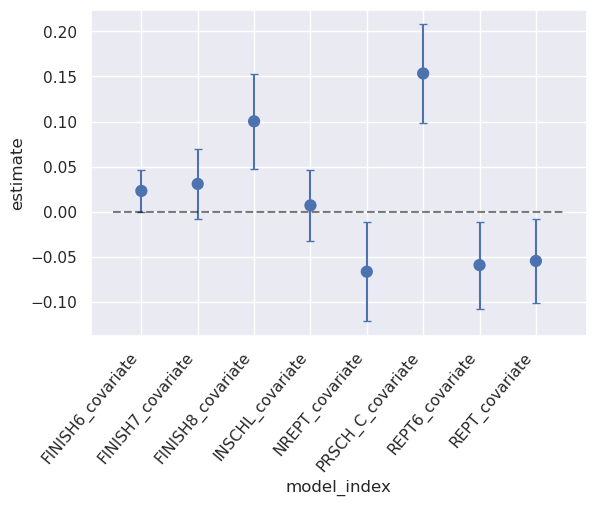

In [208]:
# 留年と進級の傾向
FILTER_TERM = "VOUCH0"

df_using_voucher_results = (
    df_result
    .filter(regex="covariate", axis="index")
    .reset_index(names="model_index")
    .assign(
        term=FILTER_TERM,
        estimate=lambda df_: df_["estimate"].map(lambda x: x[FILTER_TERM]),
        lower_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][0]),
        upper_ci_95=lambda df_: df_["ci_95"].map(lambda x: x.loc[FILTER_TERM][1]),
        pvalue=lambda df_: df_["pvalue"].map(lambda x: x[FILTER_TERM])
    )
    [["model_index", "term", "estimate", "lower_ci_95", "upper_ci_95", "pvalue"]]
    .sort_values(by="model_index")
    .query("model_index.str.contains('FINISH|INSCHL|NREPT|PRSCH_C|REPT')", engine="python")
)

# 留年の傾向を可視化
fig, ax = plt.subplots(1, 1)
sns.pointplot(
    data=df_using_voucher_results,
    x="model_index", 
    y="estimate",
    join=False
)
yerr = [
    df_using_voucher_results["estimate"].to_numpy() - df_using_voucher_results["lower_ci_95"].to_numpy(),
    df_using_voucher_results["upper_ci_95"].to_numpy() - df_using_voucher_results["estimate"].to_numpy()
]
ax.errorbar(
    df_using_voucher_results["model_index"],
    df_using_voucher_results["estimate"],
    yerr=yerr,
    capsize=3,
    linestyle=""
)
 
ax.hlines(
    y=0.0, 
    xmin=-0.5, 
    xmax=len(df_using_voucher_results)-0.5, 
    linestyles="dashed",
    color="black",
    alpha=0.5
)

ax.grid(True)
fig.autofmt_xdate(rotation=50)
plt.show()

- このグラフは，進学や留年に関する変数を目的変数とした回帰分析における当選グループの効果を示している．
- 縦軸には効果量が示されており，横軸はどのモデルにおける結果かを示している．
- また，効果量を示す点の上下の幅は95%の信頼区間を表しており，この幅が0にかかっていない場合には5%の有意水準で有意差があるということになる．